<a href="https://colab.research.google.com/github/bridgetmanu/QDA_LDA_KNN/blob/main/Copy_of_Mini_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from scipy.stats import multivariate_normal
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Set random seed for reproducibility
np.random.seed(1)

In [3]:
# Data preprocessing

# load the data
forest = pd.read_csv('/content/drive/MyDrive/forestfires.csv')
forest.info()
forest.describe()

# log transformation
copy_forest = forest.copy()
copy_forest['area'] = copy_forest['area'].replace(0, 1)
copy_forest['area'] = np.log(copy_forest['area'])




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       515 non-null    int64  
 1   Y       515 non-null    int64  
 2   month   515 non-null    object 
 3   day     515 non-null    object 
 4   FFMC    515 non-null    float64
 5   DMC     515 non-null    float64
 6   DC      515 non-null    float64
 7   ISI     515 non-null    float64
 8   temp    515 non-null    float64
 9   RH      515 non-null    int64  
 10  wind    515 non-null    float64
 11  rain    515 non-null    float64
 12  area    515 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.4+ KB


a. Exploratory Data analysis

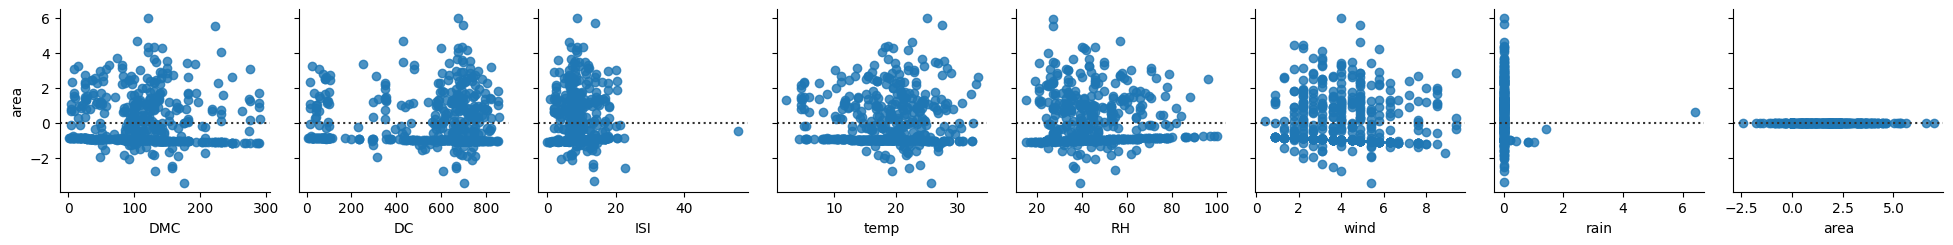

In [47]:
# create a subset with just the continuous variables
forest_subset = copy_forest.iloc[:, -8:]


# create scatterplots for all quantitative data
q = sns.PairGrid(forest_subset, y_vars=['area'])
q.map(sns.scatterplot)
plt.show()

# create boxplots for all quantitative data
q = sns.PairGrid(forest_subset, y_vars=['area'])
q.map(sns.residplot)
plt.show()

# create a subset with just the categorical variables
forest_subset2 = forest[['month','day','area']]

# creates a subset with area values > 0
forest_subset2 = forest_subset2[forest_subset2['area'] > 0]
forest_subset2.head()

# create barplots for all categorical data
ord = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
w = sns.barplot(x='area', y='month', data=forest_subset2, errorbar=None,
            hue='day', dodge=False, order=ord, orient="h")
plt.show()







                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.012
Date:                Thu, 19 Sep 2024   Prob (F-statistic):              0.315
Time:                        02:14:24   Log-Likelihood:                -912.92
No. Observations:                 515   AIC:                             1830.
Df Residuals:                     513   BIC:                             1838.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8294      0.142      5.859      0.0

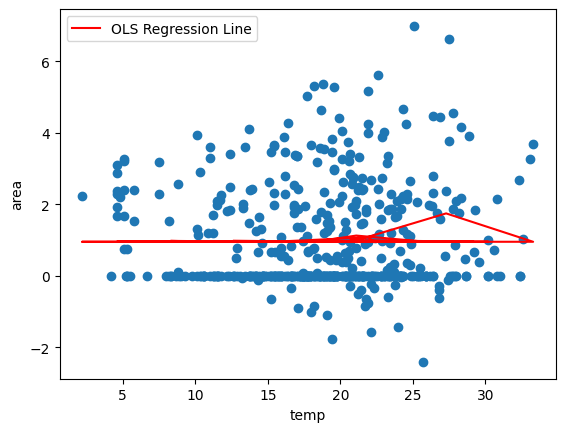

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.461
Date:                Thu, 19 Sep 2024   Prob (F-statistic):             0.0676
Time:                        02:14:24   Log-Likelihood:                -894.12
No. Observations:                 515   AIC:                             1842.
Df Residuals:                     488   BIC:                             1957.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3468      1.691     -0.205   

In [22]:
# 15a: fit a simple linear regression model to predict the response
X_vars =['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
model = 0
for i in X_vars:
  model = smf.ols('area ~ ' + i, data=copy_forest).fit()
  print(model.summary())


#15b: it a multiple regression model to predict the response using all of the predictors
model2 = smf.ols('area ~ X + Y + month + day + FFMC + DMC + DC + ISI + temp + RH + wind + rain', data=copy_forest).fit()
print(model2.summary())




## 2: Diabetes Dataset

In [39]:


dtrain = pd.read_csv('/content/drive/MyDrive/diabetes_train.csv')

# make Outcome into categorical data
dtrain['Outcome'] = dtrain['Outcome'].astype('category')
print(dtrain.head())

# selects all excluding outcome variable
dtrain_p = dtrain.iloc[:, :-1]

# selects only outcome variable
dtrain_out = dtrain.iloc[:, -1]

# standardize the predictors
sd = StandardScaler()
dtrain_p= sd.fit_transform(dtrain_p)
d_train = pd.DataFrame(dtrain_p, columns=dtrain.columns[:-1])
d_train['Outcome'] = dtrain_out
print(d_train.head())


dtest = pd.read_csv('/content/drive/MyDrive/diabetes_test.csv')

# selects all excluding outcome variable
dtest_p = dtest.iloc[:, :-1]

# standardize the predictors
dtest_p = sd.fit_transform(dtest_p)

# selects only outcome variable
dtest_out = dtest.iloc[:, -1]

# make into dataframe
dtest = pd.DataFrame(dtest_p, columns=dtest.columns[:-1])
dtest['Outcome'] = dtest_out

# make Outcome into categorical data
dtest['Outcome'] = dtest['Outcome'].astype('category')
print(dtest.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            1       89             66             23       94  28.1   
3            0      137             40             35      168  43.1   
4            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.167   21       0  
3                     2.288   33       1  
4                     0.201   30       0  
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.656704  0.871364       0.154423       0.910797 -0.683127  0.215039   
1    -0.844579 -1.132137      -0.145844       0.536313 -0.683127 -0.674453   
2    -0.844579 -1.004930      -0.145844       0.161830  0.133592 -0.483848 

#### a: exploratory data analysis

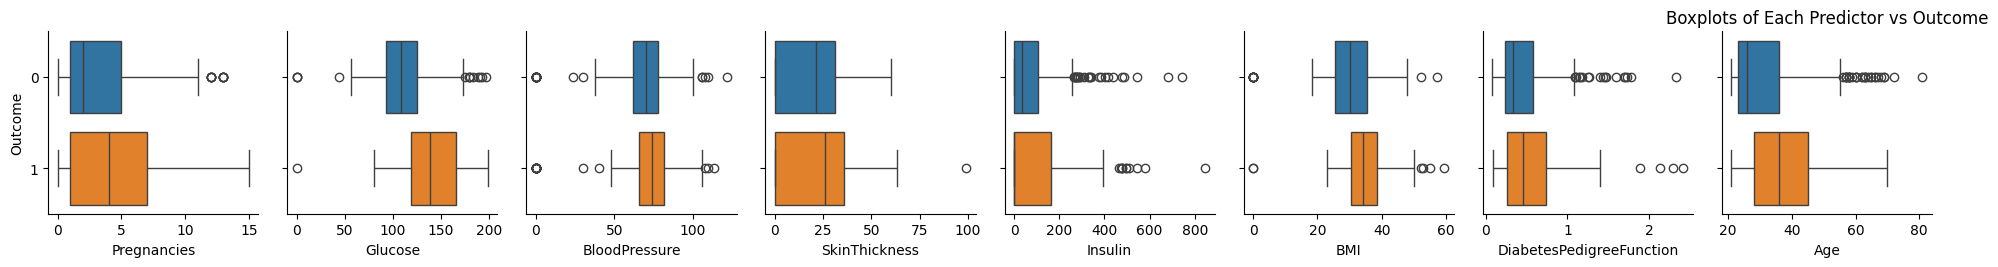

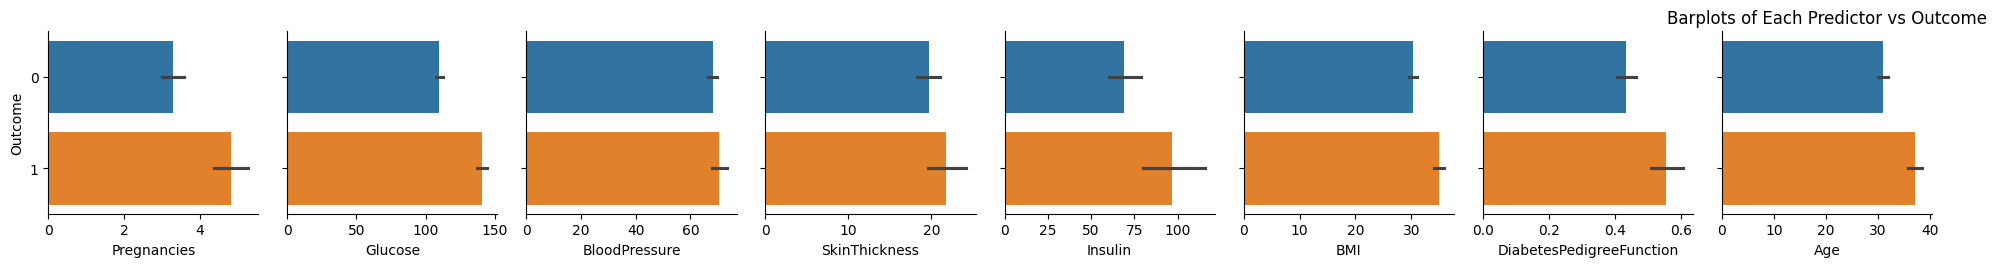

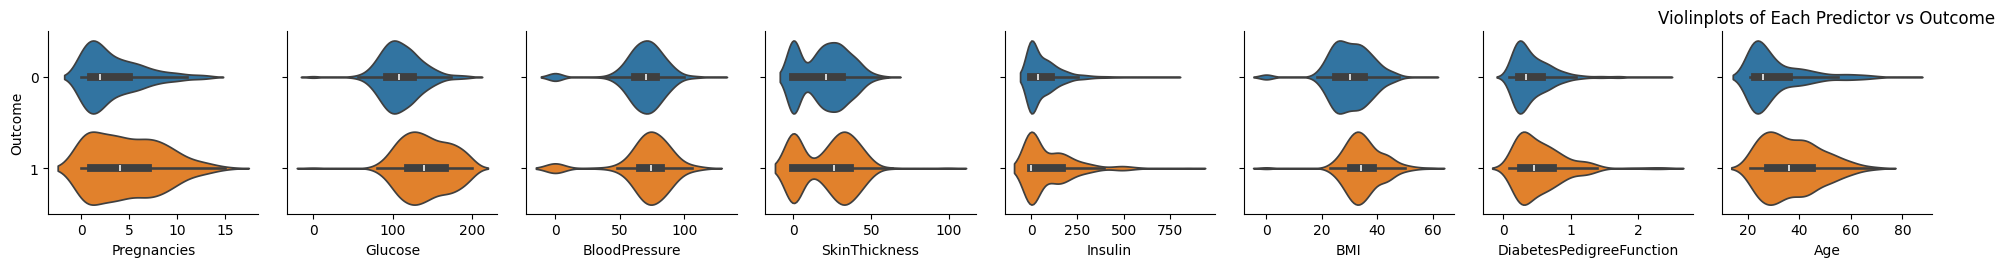

In [ ]:
# boxplots to visualize the relationship between the predictors and outcome
sns.PairGrid(dtrain, y_vars=['Outcome'], hue='Outcome').map(sns.boxplot)
plt.title('Boxplots of Each Predictor vs Outcome')
plt.show()

# barplots to visualize the relationship between the predictors and outcome
sns.PairGrid(dtrain, y_vars=['Outcome'], hue='Outcome').map(sns.barplot)
plt.title('Barplots of Each Predictor vs Outcome')
plt.show()

# violinplots to visualize the relationship between the predictors and outcome
sns.PairGrid(dtrain, y_vars=['Outcome'], hue='Outcome').map(sns.violinplot)
plt.title('Violinplots of Each Predictor vs Outcome')
plt.show()

##### b: Perform an LDA on the training data

In [40]:
# LDA Model

lda = LDA()
lda.fit(dtrain_p, dtrain_out)

# Predictions of training & test data
lda_train = lda.predict(dtrain_p)
lda_test = lda.predict(dtest_p)

# confusion matrix of training & test data
matrix_train = confusion_matrix(dtrain_out, lda_train)
matrix_test = confusion_matrix(dtest_out, lda_test)
print("Confusion matrix for Training data")
print(matrix_train)
print("\nConfusion matrix for Test data")
print(matrix_test)




Confusion matrix for Training data
[[405  54]
 [106 135]]

Confusion matrix for Test data
[[36  5]
 [13 14]]


##### c: Perform QDA on the data

In [ ]:
# Fit QDA Model
qda = QDA()
qda.fit(dtrain_p, dtrain_out)

# Predictions of training & test data
qda_train = qda.predict(dtrain_p)
qda_test = qda.predict(dtest_p)

# confusion matrix of training & test data
qmatrix_train = confusion_matrix(dtrain_out, qda_train)
qmatrix_test = confusion_matrix(dtest_out, qda_test)
print("Confusion matrix for Training data")
print(qmatrix_train)
print("\nConfusion matrix for Test data")
print(qmatrix_test)



Confusion matrix for Training data
[[397  62]
 [ 99 142]]

Confusion matrix for Test data
[[35  6]
 [13 14]]


##### d: Perform Naive Bayes on the data

In [ ]:
# Naive Bayes

# fitting the naive bayes model
nb = GaussianNB()
nb.fit(dtrain_p, dtrain_out)

# prediction of training & test data
nb_pred = nb.predict(dtrain_p)
nb_test = nb.predict(dtest_p)

# confusion matrix of training and test data
nb_matrix = confusion_matrix(dtrain_out, nb_pred)
nb_test_matrix = confusion_matrix(dtest_out, nb_test)
print("Confusion matrix for Training data")
print(nb_matrix)
print("\nConfusion matrix for Test data")
print(nb_test_matrix)



Confusion matrix for Training data
[[387  72]
 [ 95 146]]

Confusion matrix for Test data
[[35  6]
 [10 17]]


##### e: Perform KNN on the data

In [46]:
# create a list of k values ranging from 1 - 100
ks = list(range(1, 100))
train_error_rates = []
test_error_rates = []
for k in ks:
 # Create and fit the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(dtrain_p, dtrain_out)
    knn_train = knn.predict(dtrain_p)
    knn_test = knn.predict(dtest_p)
    train_error_rates.append(1 - accuracy_score(dtrain_out, knn_train))
    test_error_rates.append(1 - accuracy_score(dtest_out, knn_test))

# Best k
optimal_k = ks[np.argmin(test_error_rates)]
print(f'Optimal k: {optimal_k}')

# Fit KNN model using best K
knn = KNeighborsClassifier(n_neighbors= optimal_k)
knn.fit(dtrain_p, dtrain_out)

# Prediction of training and test data
knn_train = knn.predict(dtrain_p)
knn_test = knn.predict(dtest_p)

# Confusion matrix of training and test data
kmatrix_train = confusion_matrix(dtrain_out, knn_train)
kmatrix_test = confusion_matrix(dtest_out, knn_test)
print("Confusion matrix for Training data")
print(kmatrix_train)
print("\nConfusion matrix for Test data")
print(kmatrix_test)



[9]


In [ ]:
# misclassification rates for each model

error_lda = np.mean(lda_test != dtest_out)
error_qda = np.mean(qda_test != dtest_out)
error_nb = np.mean(nb_test != dtest_out)
error_knn = np.mean(knn_test != dtest_out)

print('LDA Error rate:', error_lda)
print('QDA Error rate:', error_qda)
print('Naive Bayes Error rate:', error_nb)
print('KNN Error rate', error_knn)

LDA Error rate: 0.2647058823529412
QDA Error rate: 0.27941176470588236
Naive Bayes Error rate: 0.23529411764705882
KNN Error rate 0.20588235294117646


## 3: Admission Dataset

In [32]:
# load the file into a dataframe
admin = pd.read_csv('/content/drive/MyDrive/admission.csv')

# split into training and test data
Group_1 = admin[admin['Group'] == 1]
Group_1 = Group_1.head(5)
Group_2 = admin[admin['Group'] == 2]
Group_2 = Group_2.head(5)
Group_3 = admin[admin['Group'] == 3]
Group_3 = Group_3.head(5)

admin_test = pd.concat([Group_1, Group_2, Group_3])

admin_train = admin[~admin.isin(admin_test)].dropna()

# subset the predictors & Group for training data
admin_train_x = admin_train.iloc[:, :-1]

admin_train_xnp = admin_train_x.to_numpy()


admin_train_y = admin_train.iloc[:,-1]
admin_train_y.info()
admin_train_ynp = admin_train_y.to_numpy()


# subset the predictors & Group for test data
admin_test_x = admin_test.iloc[:, :-1]
admin_test_xnp = admin_test_x.to_numpy()
admin_test_y = admin_test.iloc[:,-1]
admin_test_ynp = admin_test_y.to_numpy()


<class 'pandas.core.series.Series'>
Index: 70 entries, 5 to 84
Series name: Group
Non-Null Count  Dtype  
--------------  -----  
70 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


##### a: exploratory data analysis

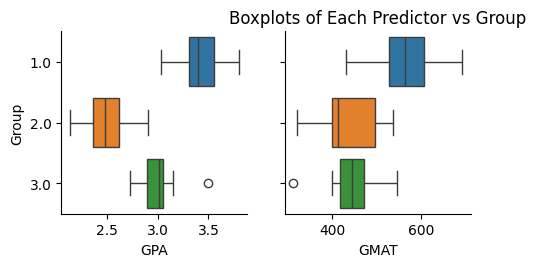

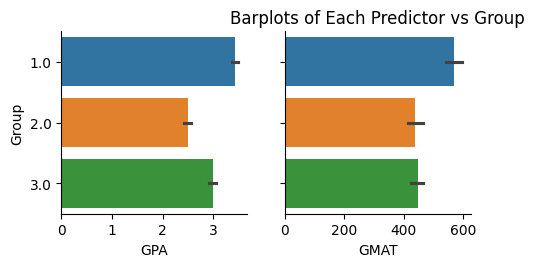

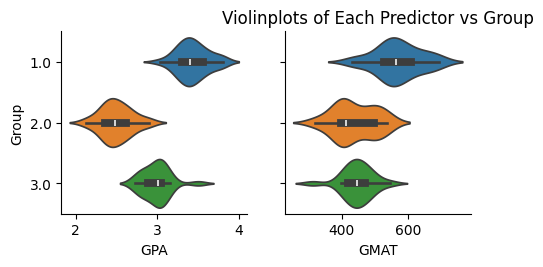

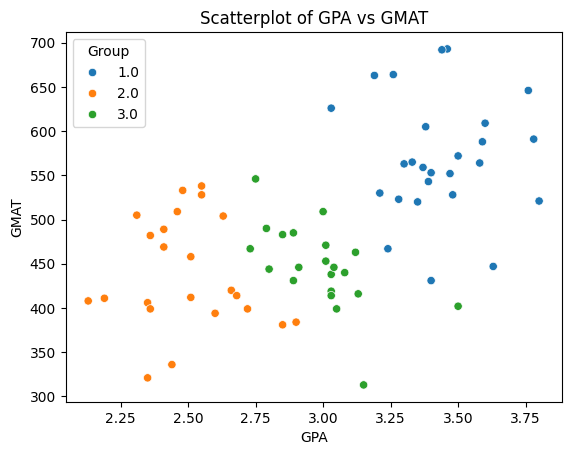

In [27]:
# make Group into factor variable
admin_train.iloc[:,-1] = admin_train.iloc[:,-1].astype('category')

# boxplots to visualize the relationship between the predictors and groups
sns.PairGrid(admin_train, y_vars=['Group'], hue='Group').map(sns.boxplot)
plt.title('Boxplots of Each Predictor vs Group')
plt.show()

# barplots to visualize the relationship between the predictors and groups
sns.PairGrid(admin_train, y_vars=['Group'], hue='Group').map(sns.barplot)
plt.title('Barplots of Each Predictor vs Group')
plt.show()

# violinplots to visualize the relationship between the predictors and groups
sns.PairGrid(admin_train, y_vars=['Group'], hue='Group').map(sns.violinplot)
plt.title('Violinplots of Each Predictor vs Group')
plt.show()

# scatterplot to visualize the relationship between GPA & GMAT coded by Groups
sns.scatterplot(x='GPA', y='GMAT', data=admin_train, hue='Group')
plt.title('Scatterplot of GPA vs GMAT')
plt.show()


##### b: LDA Model for Admission Dataset


In [33]:
# fitting the LDA model
admin_lda = LDA()
admin_lda.fit(admin_train_xnp, admin_train_ynp)

# predict the training data and test data
admin_lda_train = admin_lda.predict(admin_train_xnp)
admin_lda_test = admin_lda.predict(admin_test_xnp)

# confusion matrix based on training & test data
admin_lda_matrix = confusion_matrix(admin_train_ynp, admin_lda_train)
admin_lda_test_matrix = confusion_matrix(admin_test_ynp, admin_lda_test)
print("Confusion matrix for training data")
print(admin_lda_matrix)
print("Confusion matrix for test data")
print(admin_lda_test_matrix)

# misclassification error based on training & test data
admin_lda_misclassification_rate = 1 - accuracy_score(admin_train_ynp, admin_lda_train)
admin_lda_test_misclassification_rate = 1 - accuracy_score(admin_test_ynp, admin_lda_test)
print("Misclassification rate for training data")
print(admin_lda_misclassification_rate)
print("Misclassification rate for test data")
print(admin_lda_test_misclassification_rate)



Confusion matrix for training data
[[24  0  2]
 [ 0 21  2]
 [ 1  1 19]]
Confusion matrix for test data
[[2 0 3]
 [0 5 0]
 [0 0 5]]
Misclassification error rate for training data
0.08571428571428574
Misclassification error rate for test data
0.19999999999999996


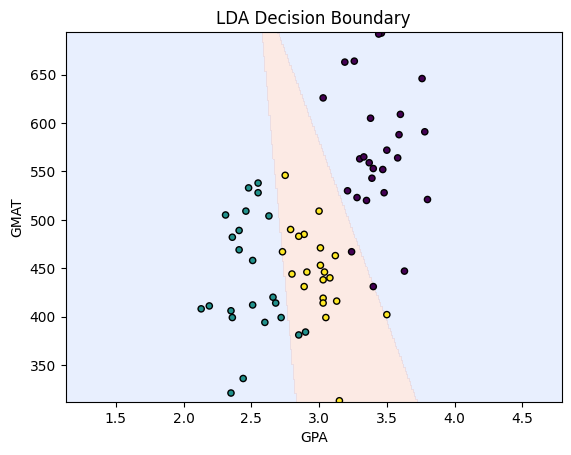

In [34]:
# Plot training data and decision boundary
plt.figure()
# Create a meshgrid of points to evaluate the decision boundary
x_min, x_max = admin_train_xnp[:, 0].min() - 1, admin_train_xnp[:, 0].max() + 1
y_min, y_max = admin_train_xnp[:, 1].min() - 1, admin_train_xnp[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Use the model to predict class labels for each point in the meshgrid
Z = admin_lda.predict(np.c_[xx.ravel(), yy.ravel()])


# Reshape the prediction to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, levels=np.unique(Z), cmap='coolwarm')
plt.scatter(admin_train_xnp[:, 0], admin_train_xnp[:, 1], c=admin_train_ynp, edgecolor='k', s=20)
plt.xlabel("GPA")
plt.ylabel("GMAT")
plt.title("LDA Decision Boundary")
plt.show()

##### d: QDA Model for Admission Dataset

In [35]:
# fitting the QDA model
admin_qda = QDA()
admin_qda.fit(admin_train_xnp, admin_train_ynp)

# predict the training data and test data
admin_qda_train = admin_qda.predict(admin_train_xnp)
admin_qda_test = admin_qda.predict(admin_test_xnp)

# confusion matrix based on training & test data
admin_qda_matrix = confusion_matrix(admin_train_ynp, admin_qda_train)
admin_qda_test_matrix = confusion_matrix(admin_test_ynp, admin_qda_test)
print("Confusion matrix for training data")
print(admin_qda_matrix)
print("Confusion matrix for test data")
print(admin_qda_test_matrix)

# misclassification rate based on training & test data
admin_qda_misclassification_rate = 1 - accuracy_score(admin_train_ynp, admin_qda_train)
admin_qda_test_misclassification_rate = 1 - accuracy_score(admin_test_ynp, admin_qda_test)
print("Misclassification rate for training data")
print(admin_qda_misclassification_rate)
print("Misclassification rate for test data")
print(admin_qda_test_misclassification_rate)


Confusion matrix for training data
[[26  0  0]
 [ 0 22  1]
 [ 1  0 20]]
Confusion matrix for test data
[[4 0 1]
 [0 5 0]
 [0 0 5]]
Misclassification error rate for training data
0.02857142857142858
Misclassification error rate for test data
0.06666666666666665
